# K-FOLD VALIDATION


In [1]:
# k-fold cross validation
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold

In [2]:
import pickle
import numpy as np


with open('./Model/Dataset Skripsi - Fix Dataset (Final) - Clean - 80 - Train - TFIDF.pkl', 'rb') as f:
    df_train_80 = pickle.load(f)

with open('./Model/Dataset Skripsi - Fix Dataset (Final) - Clean - 80 - Test - TFIDF.pkl', 'rb') as f:
    df_test_80 = pickle.load(f)

In [3]:
# join train and test data
df = pd.concat([df_train_80, df_test_80], ignore_index=True)

In [4]:
X_train = df['tfidf']
y_train = df['category_id']

In [5]:
from nn import NeuralNetwork
def kfold_cross_validation(X_train, y_train, model_hl_node, model_lr, k=10):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = []
    for train_index, test_index in kf.split(X_train):
        X_train_k, X_test_k = X_train[train_index], X_train[test_index]
        y_train_k, y_test_k = y_train[train_index], y_train[test_index]

        # convert to numpy array and transpose the matrix to fit the model
        X_train_k_np_T = np.array([np.array(x) for x in X_train_k]).T
        X_test_k_np_T = np.array([np.array(x) for x in X_test_k]).T
        
        # init model
        myNN = NeuralNetwork(X_train_k_np_T.shape[0], model_hl_node, 3)
        history_cost_k, history_acc_k = myNN.train_until_cost_doesnt_change(X_train_k_np_T, y_train_k, model_lr)

        # predict
        _, Z1, A1, Z2, A2 = myNN.forward(X_test_k_np_T)
        predictions = np.argmax(A2, 0)
        accuracy_test_k = np.mean(predictions == y_test_k)

        scores.append(accuracy_test_k)
    return scores

In [6]:
k_scores_4 = kfold_cross_validation(X_train, y_train, 50, 0.1, 4)

Epoch 1 - train cost: 0.571581, train acc: 0.337240
Epoch 2 - train cost: 0.368032, train acc: 0.502604
Epoch 3 - train cost: 0.350395, train acc: 0.502604
Epoch 4 - train cost: 0.341225, train acc: 0.502604
Epoch 5 - train cost: 0.337135, train acc: 0.502604
Epoch 6 - train cost: 0.335647, train acc: 0.502604
Epoch 7 - train cost: 0.335139, train acc: 0.502604
Epoch 8 - train cost: 0.334917, train acc: 0.502604
Epoch 9 - train cost: 0.334768, train acc: 0.502604
Epoch 10 - train cost: 0.334635, train acc: 0.502604
Epoch 11 - train cost: 0.334506, train acc: 0.502604
Epoch 12 - train cost: 0.334379, train acc: 0.502604
Epoch 13 - train cost: 0.334251, train acc: 0.502604
Epoch 14 - train cost: 0.334124, train acc: 0.502604
Epoch 15 - train cost: 0.333997, train acc: 0.502604
Epoch 16 - train cost: 0.333871, train acc: 0.502604
Epoch 17 - train cost: 0.333744, train acc: 0.502604
Epoch 18 - train cost: 0.333618, train acc: 0.502604
Epoch 19 - train cost: 0.333493, train acc: 0.502604
Ep

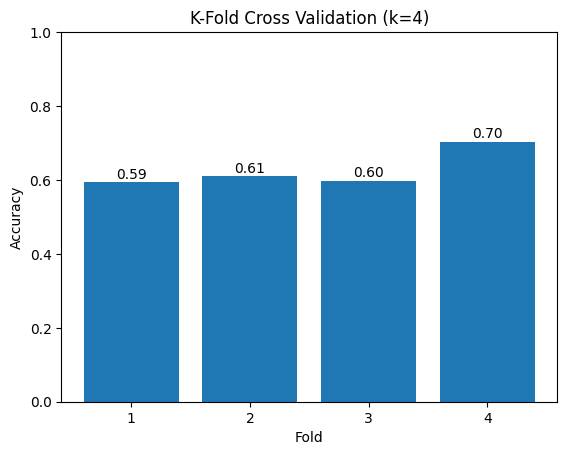

In [17]:
import matplotlib.pyplot as plt

# plot the k-fold cross validation with bar chart
plt.bar(range(1, 5), k_scores_4)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.text(1, k_scores_4[0] + 0.01, f'{k_scores_4[0]:.2f}', ha='center')
plt.text(2, k_scores_4[1] + 0.01, f'{k_scores_4[1]:.2f}', ha='center')
plt.text(3, k_scores_4[2] + 0.01, f'{k_scores_4[2]:.2f}', ha='center')
plt.text(4, k_scores_4[3] + 0.01, f'{k_scores_4[3]:.2f}', ha='center')
plt.ylim(0, 1)
plt.xticks(range(1, 5))
plt.title('K-Fold Cross Validation (k=4)')
plt.show()

In [8]:
score_mean = np.mean(k_scores_4)
score_std = np.std(k_scores_4)
print(f'Mean Accuracy: {score_mean}')
print(f'Standard Deviation: {score_std}')
print(f'Accuracy: {score_mean} (+/- {score_std})')



Mean Accuracy: 0.6259765625
Standard Deviation: 0.044911258935808274
Accuracy: 0.6259765625 (+/- 0.044911258935808274)


In [9]:
k_scores_5 = kfold_cross_validation(X_train, y_train, 50, 0.1, 5)

Epoch 1 - train cost: 0.567015, train acc: 0.340659
Epoch 2 - train cost: 0.365682, train acc: 0.503053
Epoch 3 - train cost: 0.348914, train acc: 0.501832
Epoch 4 - train cost: 0.340103, train acc: 0.503053
Epoch 5 - train cost: 0.336070, train acc: 0.503053
Epoch 6 - train cost: 0.334547, train acc: 0.503053
Epoch 7 - train cost: 0.334009, train acc: 0.503053
Epoch 8 - train cost: 0.333775, train acc: 0.503053
Epoch 9 - train cost: 0.333621, train acc: 0.503053
Epoch 10 - train cost: 0.333486, train acc: 0.503053
Epoch 11 - train cost: 0.333356, train acc: 0.503053
Epoch 12 - train cost: 0.333227, train acc: 0.503053
Epoch 13 - train cost: 0.333099, train acc: 0.503053
Epoch 14 - train cost: 0.332971, train acc: 0.503053
Epoch 15 - train cost: 0.332844, train acc: 0.503053
Epoch 16 - train cost: 0.332717, train acc: 0.503053
Epoch 17 - train cost: 0.332590, train acc: 0.503053
Epoch 18 - train cost: 0.332464, train acc: 0.503053
Epoch 19 - train cost: 0.332338, train acc: 0.503053
Ep

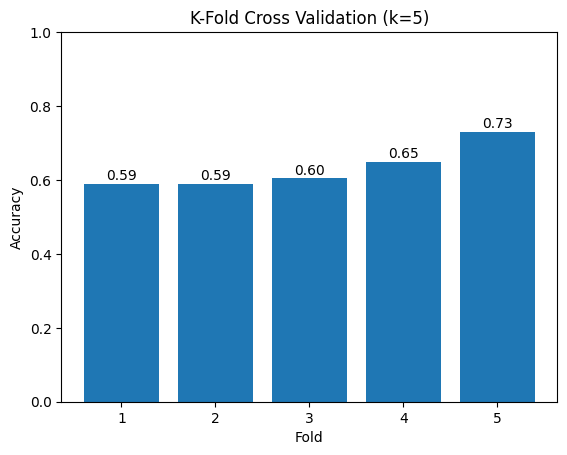

In [18]:
plt.bar(range(1, 6), k_scores_5)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.text(1, k_scores_5[0] + 0.01, f'{k_scores_5[0]:.2f}', ha='center')
plt.text(2, k_scores_5[1] + 0.01, f'{k_scores_5[1]:.2f}', ha='center')
plt.text(3, k_scores_5[2] + 0.01, f'{k_scores_5[2]:.2f}', ha='center')
plt.text(4, k_scores_5[3] + 0.01, f'{k_scores_5[3]:.2f}', ha='center')
plt.text(5, k_scores_5[4] + 0.01, f'{k_scores_5[4]:.2f}', ha='center')
plt.ylim(0, 1)
plt.xticks(range(1, 6))
plt.title('K-Fold Cross Validation (k=5)')
plt.show()

In [11]:
score_mean = np.mean(k_scores_5)
score_std = np.std(k_scores_5)
print(f'Mean Accuracy: {score_mean}')
print(f'Standard Deviation: {score_std}')
print(f'Accuracy: {score_mean} (+/- {score_std})')


Mean Accuracy: 0.632907699665232
Standard Deviation: 0.053256408655970054
Accuracy: 0.632907699665232 (+/- 0.053256408655970054)


In [12]:
k_scores_10 = kfold_cross_validation(X_train, y_train, 50, 0.1, 10)

Epoch 1 - train cost: 0.575692, train acc: 0.332248
Epoch 2 - train cost: 0.368515, train acc: 0.505972
Epoch 3 - train cost: 0.350447, train acc: 0.505972
Epoch 4 - train cost: 0.341134, train acc: 0.505972
Epoch 5 - train cost: 0.337026, train acc: 0.505972
Epoch 6 - train cost: 0.335560, train acc: 0.505972
Epoch 7 - train cost: 0.335071, train acc: 0.505972
Epoch 8 - train cost: 0.334864, train acc: 0.505972
Epoch 9 - train cost: 0.334727, train acc: 0.505972
Epoch 10 - train cost: 0.334606, train acc: 0.505972
Epoch 11 - train cost: 0.334488, train acc: 0.505972
Epoch 12 - train cost: 0.334371, train acc: 0.505972
Epoch 13 - train cost: 0.334255, train acc: 0.505972
Epoch 14 - train cost: 0.334140, train acc: 0.505972
Epoch 15 - train cost: 0.334025, train acc: 0.505972
Epoch 16 - train cost: 0.333910, train acc: 0.505972
Epoch 17 - train cost: 0.333796, train acc: 0.505972
Epoch 18 - train cost: 0.333681, train acc: 0.505972
Epoch 19 - train cost: 0.333567, train acc: 0.505972
Ep

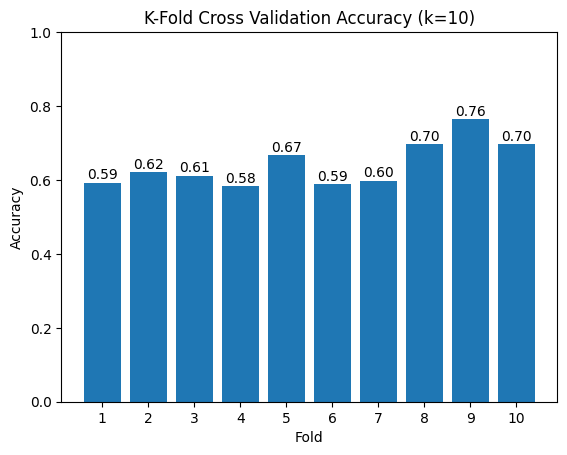

In [19]:
# plot the k-fold cross validation with bar chart
plt.bar(range(1, 11), k_scores_10)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.text(1, k_scores_10[0] + 0.01, f'{k_scores_10[0]:.2f}', ha='center')
plt.text(2, k_scores_10[1] + 0.01, f'{k_scores_10[1]:.2f}', ha='center')
plt.text(3, k_scores_10[2] + 0.01, f'{k_scores_10[2]:.2f}', ha='center')
plt.text(4, k_scores_10[3] + 0.01, f'{k_scores_10[3]:.2f}', ha='center')
plt.text(5, k_scores_10[4] + 0.01, f'{k_scores_10[4]:.2f}', ha='center')
plt.text(6, k_scores_10[5] + 0.01, f'{k_scores_10[5]:.2f}', ha='center')
plt.text(7, k_scores_10[6] + 0.01, f'{k_scores_10[6]:.2f}', ha='center')
plt.text(8, k_scores_10[7] + 0.01, f'{k_scores_10[7]:.2f}', ha='center')
plt.text(9, k_scores_10[8] + 0.01, f'{k_scores_10[8]:.2f}', ha='center')
plt.text(10, k_scores_10[9] + 0.01, f'{k_scores_10[9]:.2f}', ha='center')
plt.ylim(0, 1)
plt.xticks(range(1, 11))
plt.title('K-Fold Cross Validation Accuracy (k=10)')
plt.show()

In [14]:
score_mean = np.mean(k_scores_10)
score_std = np.std(k_scores_10)
print(f'Mean Accuracy: {score_mean}')
print(f'Standard Deviation: {score_std}')
print(f'Accuracy: {score_mean} (+/- {score_std})')

Mean Accuracy: 0.6417570911859889
Standard Deviation: 0.05804996628446713
Accuracy: 0.6417570911859889 (+/- 0.05804996628446713)
